#**AIRLINES DATA CHALLENGE**
### **Author: Soumya Bhandari**
### **Problem Statement**
You are working for an airline company looking to enter the United States domestic market.
Specifically, the company has decided to start with 5 round trip routes between medium and
large US airports. An example of a round trip route is the combination of JFK to ORD and ORD
to JFK. The airline company has to acquire 5 new airplanes (one per round trip route) and the
upfront cost for each airplane is $90 million. The company’s motto is “On time, for you”
, so
punctuality is a big part of its brand image.
You have been tasked with analyzing 1Q2019 data to identify:
1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

In [1]:
# ***************** STEP 1 *****************

# importing the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ***************** STEP 2 *****************

# Loading data from uploaded CSV files
def load_data():
    # Reading the CSV files and creating a dataframe for performing the analysis
    flights = pd.read_csv("/content/sample_data/Flights.csv", low_memory=False)
    tickets = pd.read_csv("/content/sample_data/Tickets.csv")
    airports = pd.read_csv("/content/sample_data/Airport_Codes.csv")
    return flights, tickets, airports

In [3]:
# Preview the sample data of 5 rows of flights DF
flights, tickets, airports = load_data()
flights.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [4]:
# Preview the sample data of 5 rows of tickets DF
flights, tickets, airports = load_data()
tickets.head(5)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [5]:
# Preview the sample data of 5 rows of airports DF
flights, tickets, airports = load_data()
airports.head(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [7]:
# Preview the sample data and print row and column information
flights, tickets, airports = load_data()

# Preview the Flights sample data and print number of row and column information
print("Flights DataFrame:")
print("Number of rows:", len(flights))
print("Number of columns:", len(flights.columns))
print("Columns:", flights.columns.tolist())

# Preview the Tickets sample data and print number of row and column information
print("\nTickets DataFrame:")
print("Number of rows:", len(tickets))
print("Number of columns:", len(tickets.columns))
print("Columns:", tickets.columns.tolist())

# Preview the Airport sample data and print number of row and column information
print("\nAirports DataFrame:")
print("Number of rows:", len(airports))
print("Number of columns:", len(airports.columns))
print("Columns:", airports.columns.tolist())

Flights DataFrame:
Number of rows: 1915886
Number of columns: 16
Columns: ['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE']

Tickets DataFrame:
Number of rows: 1167285
Number of columns: 12
Columns: ['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP', 'REPORTING_CARRIER', 'PASSENGERS', 'ITIN_FARE', 'DESTINATION']

Airports DataFrame:
Number of rows: 55369
Number of columns: 8
Columns: ['TYPE', 'NAME', 'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY', 'IATA_CODE', 'COORDINATES']


In [8]:
# ***************** STEP 3 *****************

# Rename columns to standardized names
# Renaming DESTINATION and OCCUPANCY_RATE colunms name in flights data to DEST and OCCUPANCY
flights = flights.rename(columns={
    'DESTINATION': 'DEST',
    'OCCUPANCY_RATE': 'OCCUPANCY'
})
# Renaming ITIN_FARE colunm name in Tickets data to TICKET_PRICE
tickets = tickets.rename(columns={
    'ITIN_FARE': 'TICKET_PRICE'
})
# Renaming TYPE colunm name in Airport data to AIRPORT_SIZE
airports.rename(columns={
    'TYPE': 'AIRPORT_SIZE'
}, inplace=True)

In [9]:
# Check column names after renaming in the step 3 for Flights, Tickets and Airports file
print("Flights columns:", flights.columns.tolist())
print("Tickets columns:", tickets.columns.tolist())
print("Airports columns:", airports.columns.tolist())

Flights columns: ['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY']
Tickets columns: ['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP', 'REPORTING_CARRIER', 'PASSENGERS', 'TICKET_PRICE', 'DESTINATION']
Airports columns: ['AIRPORT_SIZE', 'NAME', 'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY', 'IATA_CODE', 'COORDINATES']


#---------------- Module: DATA QUALITY -------------------

In [10]:
# ***************** STEP 4 *****************
# ---------------- Module: DATA QUALITY ------------------- #

def data_quality_checks(flights, tickets, airports):
    """
    Performs essential data quality checks on flights, tickets, and airport datasets
    Highlights missing values, outliers, duplicates, and category issues for cleaning and validation
    Parameters:
        flights (DF): Cleaned Flights dataset
        tickets (DF): Cleaned Tickets dataset
        airports (DF): Cleaned Airport Codes dataset
    Returns:
        None
    """
    print("="*60)
    print("DATA QUALITY REPORT")
    print("="*60)

    # Ensure relevant columns are in numeric datatype
    flights['DISTANCE'] = pd.to_numeric(flights['DISTANCE'], errors='coerce')
    flights['OCCUPANCY'] = pd.to_numeric(flights['OCCUPANCY'], errors='coerce')
    tickets['TICKET_PRICE'] = pd.to_numeric(tickets['TICKET_PRICE'], errors='coerce')

    # --------- Flights.csv Checks ----
    print("\n Flights Dataset Checks")

    # Missing values in critical columns
    missing = flights[['FL_DATE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'OCCUPANCY', 'DISTANCE']].isnull().sum()
    print("Missing values in key columns:")
    print(missing)

    # Delay outliers
    delay_outliers = flights[(flights['DEP_DELAY'] > 1000) | (flights['DEP_DELAY'] < -15)]
    print(f"\nExtreme departure delays (count: {len(delay_outliers)}):")
    print(delay_outliers[['ORIGIN', 'DEST', 'DEP_DELAY']].head())

    # Occupancy outside valid range
    occupancy_outliers = flights[(flights['OCCUPANCY'] < 0) | (flights['OCCUPANCY'] > 1)]
    print(f"\nInvalid occupancy values (count: {len(occupancy_outliers)}):")
    print(occupancy_outliers[['ORIGIN', 'DEST', 'OCCUPANCY']].head())

    # Distance errors
    distance_issues = flights[flights['DISTANCE'] <= 0]
    print(f"\nInvalid DISTANCE values (count: {len(distance_issues)}):")
    print(distance_issues[['ORIGIN', 'DEST', 'DISTANCE']].head())

    # ------- Tickets.csv Checks ----
    print("\n Tickets Dataset Checks")

    # Invalid or missing ticket prices
    ticket_issues = tickets[tickets['TICKET_PRICE'].isnull() | (tickets['TICKET_PRICE'] <= 0)]
    print(f"Tickets with missing or invalid fare (count: {len(ticket_issues)}):")
    print(ticket_issues.head())

    # Check for duplicate rows in tickets file
    duplicate_count = tickets.duplicated(subset=['ORIGIN', 'DESTINATION', 'ROUNDTRIP']).sum()
    print(f"Duplicate ticket records based on ORIGIN+DESTINATION+ROUNDTRIP: {duplicate_count}")

    # ------ Airport_Codes.csv Checks ----
    print("\n Airports Dataset Checks")

    # Check for Missing and duplicate rows in Airports file
    missing_airports = airports['IATA_CODE'].isnull().sum()
    duplicate_airports = airports['IATA_CODE'].duplicated().sum()
    print(f"Missing IATA_CODEs: {missing_airports} | Duplicate IATA_CODEs: {duplicate_airports}")

    # Checking the AIRPORT_SIZE distribution
    print("Airport size (AIRPORT_SIZE) distribution:")
    print(airports['AIRPORT_SIZE'].value_counts())

    print("\n Data quality checks completed.")
    print("="*60)

In [11]:
# Making a function call to display the sample data in the output
data_quality_checks(flights, tickets, airports)

DATA QUALITY REPORT

 Flights Dataset Checks
Missing values in key columns:
FL_DATE          0
ORIGIN           0
DEST             0
DEP_DELAY    50351
ARR_DELAY    55991
OCCUPANCY      310
DISTANCE      2740
dtype: int64

Extreme departure delays (count: 14485):
      ORIGIN DEST  DEP_DELAY
9240     MDW  OMA      -19.0
16962    SMF  SEA      -16.0
16977    SNA  SFO      -16.0
17013    SMF  SAN      -16.0
17026    BUR  PDX      -18.0

Invalid occupancy values (count: 0):
Empty DataFrame
Columns: [ORIGIN, DEST, OCCUPANCY]
Index: []

Invalid DISTANCE values (count: 230):
        ORIGIN DEST  DISTANCE
1910957    ATL  LAX   -1947.0
1910958    ATL  LAX   -1947.0
1910959    ATL  LAX   -1947.0
1910960    ATL  LAX   -1947.0
1910961    ATL  LAX   -1947.0

 Tickets Dataset Checks
Tickets with missing or invalid fare (count: 17412):
           ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
1003  201913102403  2019        1    ABR             US               SD   
1010  20191310

# ------------------- Module: DATA CLEANING/DATA PROCESSING ------------------- #

In [12]:
# ***************** STEP 3 *****************
# ------------------- Module: DATA CLEANING/DATA PREPROCESSING ------------------- #

def clean_all_data(flights: pd.DataFrame, tickets: pd.DataFrame, airports: pd.DataFrame, quarter: int = 1, domestic_only: bool = True, max_distance: float = 3000):
    """
    Cleans flights, tickets, and airports data and prints sample outputs
    Parameters:
        flights (DF): Raw flight records
        tickets (DF): Raw ticket-level data
        airports (DF): Raw airport metadata
        quarter (int): Which calendar quarter to filter flights by (default = 1)
        domestic_only (bool): Whether to keep only US airports
        max_distance (float): Maximum allowed flight distance
    Returns:
        flights_clean (DF): Cleaned flight data
        tickets_clean (DF): Cleaned ticket data
        airports_clean (DF): Cleaned airport data
    """
    # ----------------- AIRPORT CLEANING -------------
    # Remove airports missing essential details
    airports_clean = airports.dropna(subset=['IATA_CODE', 'NAME', 'AIRPORT_SIZE', 'ISO_COUNTRY']).copy()

    # Keep only medium and large airports (as company is targeting these)
    airports_clean = airports_clean[airports_clean['AIRPORT_SIZE'].isin(['medium_airport', 'large_airport'])]

    # keep only US airports (domestic routes only)
    if domestic_only:
        airports_clean = airports_clean[airports_clean['ISO_COUNTRY'] == 'US']

    # Create a set of valid IATA codes to filter both flights and tickets
    valid_iata = set(airports_clean['IATA_CODE'].dropna())

    # -------------- FLIGHT CLEANING -----------
    flights_clean = flights.copy()

    # Drop rows missing critical flight fields
    flights_clean.dropna(subset=['FL_DATE', 'ORIGIN', 'DEST', 'DISTANCE', 'OCCUPANCY'], inplace=True)

    # Remove cancelled flights (1 = cancelled)
    flights_clean = flights_clean[flights_clean['CANCELLED'] != 1]

    # Convert flight date string to datetime and filter for specific quarter
    flights_clean['FL_DATE'] = pd.to_datetime(flights_clean['FL_DATE'], errors='coerce')
    flights_clean = flights_clean[flights_clean['FL_DATE'].dt.quarter == quarter]

    # Convert relevant numeric fields from string to proper number format
    flights_clean['DISTANCE'] = pd.to_numeric(flights_clean['DISTANCE'], errors='coerce')
    flights_clean['OCCUPANCY'] = pd.to_numeric(flights_clean['OCCUPANCY'], errors='coerce')
    flights_clean['DEP_DELAY'] = pd.to_numeric(flights_clean['DEP_DELAY'], errors='coerce').clip(lower=-15, upper=300)
    flights_clean['ARR_DELAY'] = pd.to_numeric(flights_clean['ARR_DELAY'], errors='coerce').clip(lower=-15, upper=300)

    # Filter out flights that exceed the max distance (e.g., outliers or international)
    flights_clean = flights_clean[flights_clean['DISTANCE'] <= max_distance]

    # Remove duplicate flights based on flight date, origin, destination, and carrier flight number
    flights_clean.drop_duplicates(subset=['FL_DATE', 'ORIGIN', 'DEST', 'OP_CARRIER_FL_NUM'], inplace=True)

    #  Retain only flights where both ORIGIN and DEST are in the list of valid IATA codes
    flights_clean = flights_clean[
        flights_clean['ORIGIN'].isin(valid_iata) & flights_clean['DEST'].isin(valid_iata)
    ].copy()

    #  Add a ROUTE column (e.g., "ATL-JFK" or "JFK-ATL" → always sorted alphabetically)
    flights_clean['ROUTE'] = flights_clean.apply(lambda x: '-'.join(sorted([x['ORIGIN'], x['DEST']])), axis=1)

    # Add helper columns for weekday name and calendar day of the month
    flights_clean['FLIGHT_DAY'] = flights_clean['FL_DATE'].dt.day
    flights_clean['WEEKDAY'] = flights_clean['FL_DATE'].dt.day_name()

    # ------------- TICKET CLEANING ----------
    tickets_clean = tickets.copy()

    # Drop rows missing ticket-level data like price or passenger count
    tickets_clean.dropna(subset=['ORIGIN', 'DESTINATION', 'PASSENGERS', 'TICKET_PRICE'], inplace=True)

    # Convert numeric fields properly
    tickets_clean['TICKET_PRICE'] = pd.to_numeric(tickets_clean['TICKET_PRICE'], errors='coerce')
    tickets_clean['PASSENGERS'] = pd.to_numeric(tickets_clean['PASSENGERS'], errors='coerce')

    #  Filter  out any ticket records with zero or negative price/passenger values
    tickets_clean = tickets_clean[(tickets_clean['TICKET_PRICE'] > 0) & (tickets_clean['PASSENGERS'] > 0)]

    # Add  a ROUTE field to match with the flight records
    tickets_clean['ROUTE'] = tickets_clean.apply(lambda x: '-'.join(sorted([x['ORIGIN'], x['DESTINATION']])), axis=1)

    # Only keep tickets for valid IATA codes(ensuring alignment with flight and airport data)
    tickets_clean = tickets_clean[
        tickets_clean['ORIGIN'].isin(valid_iata) & tickets_clean['DESTINATION'].isin(valid_iata)
    ].copy()

    # Remove duplicates in tickets dataset
    tickets_clean.drop_duplicates(inplace=True)

    # ------------ SAMPLE OUTPUT ----------
    print("\n Cleaned Flights Sample:")
    print(flights_clean.head())
    print("\n Cleaned Tickets Sample:")
    print(tickets_clean.head())
    print("\n Cleaned Airports Sample:")
    print(airports_clean.head())

    return flights_clean, tickets_clean, airports_clean

In [13]:
# view sample output of clean
flights_clean, tickets_clean, airports_clean = clean_all_data(flights, tickets, airports)


 Cleaned Flights Sample:
     FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN   N955WN              4591              14635    RSW   
1 2019-03-02         WN   N8686A              3231              14635    RSW   
2 2019-03-02         WN   N201LV              3383              14635    RSW   
3 2019-03-02         WN   N413WN              5498              14635    RSW   
4 2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DEST DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  \
0   Fort Myers, FL            11042  CLE  Cleveland, OH       -8.0       -6.0   
1   Fort Myers, FL            11066  CMH   Columbus, OH        1.0        5.0   
2   Fort Myers, FL            11066  CMH   Columbus, OH        0.0        4.0   
3   Fort Myers, FL            11066  CMH   Columbus, OH       11.0       14.0   
4   Fort Myers, FL            11259  DAL     Dallas, TX        0.0      -15.0   

   CAN

In [14]:
print("Original flights:", len(flights))
print("Cleaned flights:", len(flights_clean))
print("--------------------------------")
print("Original tickets:", len(tickets))
print("Cleaned tickets:", len(tickets_clean))
print("--------------------------------")
print("Original airports:", len(airports))
print("Cleaned airports:", len(airports_clean))

Original flights: 1915886
Cleaned flights: 1823832
--------------------------------
Original tickets: 1167285
Cleaned tickets: 1043438
--------------------------------
Original airports: 55369
Cleaned airports: 821




# **Exploratory Data Analysis**
### **Data Visualization and findings on cleaned data**

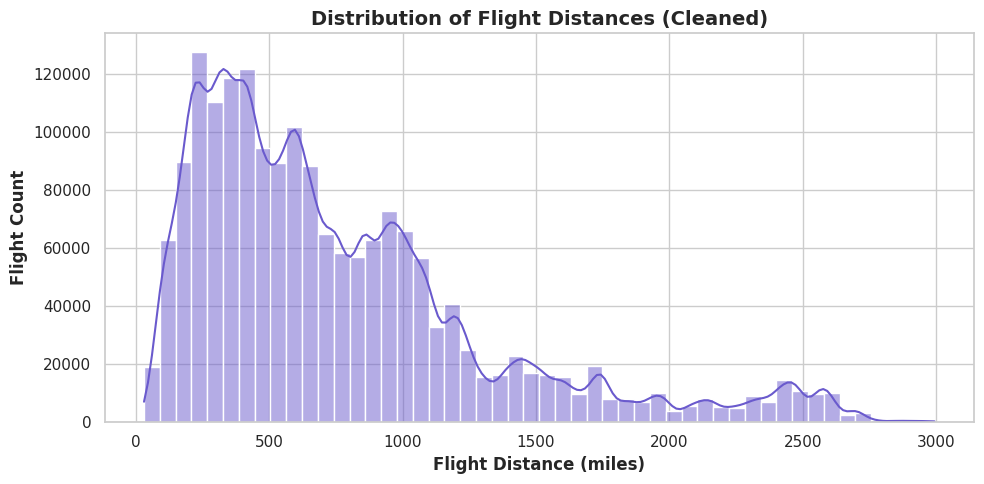

In [15]:
# ------------------------ Distribution of Flight Distances (Histogram) ------------------------
# Graph 1
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 5))
sns.histplot(flights_clean['DISTANCE'], bins=50, kde=True, color='slateblue')
plt.title("Distribution of Flight Distances (Cleaned)", fontsize=14, weight='bold')
plt.xlabel("Flight Distance (miles)", fontsize=12, weight='bold')
plt.ylabel("Flight Count", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

**Data Interpretation - Distribution of Flight Distances**

- The majority of flights fall between 200 to 1200 miles, indicating strong demand for short- to medium-haul routes.
- A sharp peak around 300–400 miles suggests highly frequent regional connections.
- Flight frequency steadily declines as distance increases, with relatively fewer long-haul flights beyond 1500 miles.
- This distribution confirms the operational focus on domestic and mid-range routes, ideal for optimizing fleet utilization and cost efficiency.

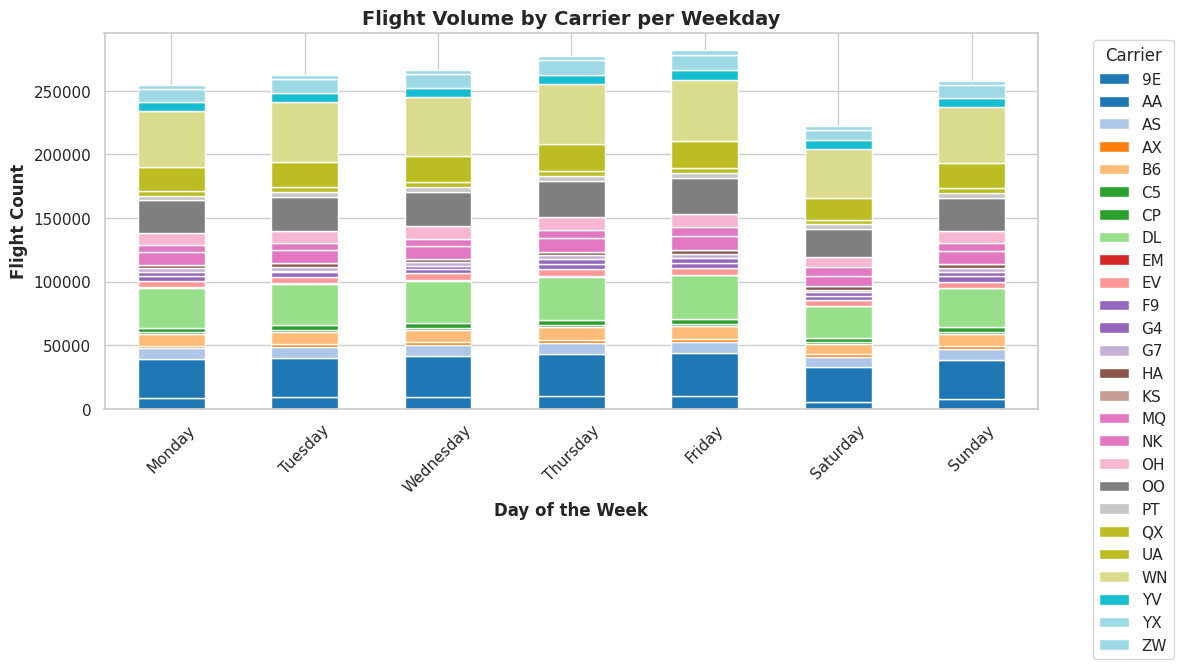

In [16]:
# ---------------------- Stacked Bar Chart of Flight Volume by Carrier per Weekday ---------------------
# Graph 2

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Group and pivot
weekday_carrier = flights_clean.groupby(['WEEKDAY', 'OP_CARRIER']).size().reset_index(name='FLIGHT_COUNT')
weekday_carrier_pivot = weekday_carrier.pivot(index='WEEKDAY', columns='OP_CARRIER', values='FLIGHT_COUNT').fillna(0)
# Reorder rows
weekday_carrier_pivot = weekday_carrier_pivot.loc[weekday_order]
# Plot
weekday_carrier_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Flight Volume by Carrier per Weekday", fontsize=14, weight='bold')
plt.xlabel("Day of the Week", fontsize=12, weight='bold')
plt.ylabel("Flight Count", fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Data Interpretation - Weekly Flight Volume by Airline**

- Flight activity is highest on weekdays, especially Monday to Friday, aligning with typical business travel patterns.
- Major carriers operate consistently across all days, indicating a broad route network and regular demand.
- Smaller or regional airlines show variable presence, often focusing on specific days or routes.
- Weekend flight volumes are noticeably lower, likely reflecting reduced business travel and selective leisure routes.
- The chart helps identify which airlines are dominant on specific days, aiding scheduling and partnership strategies.


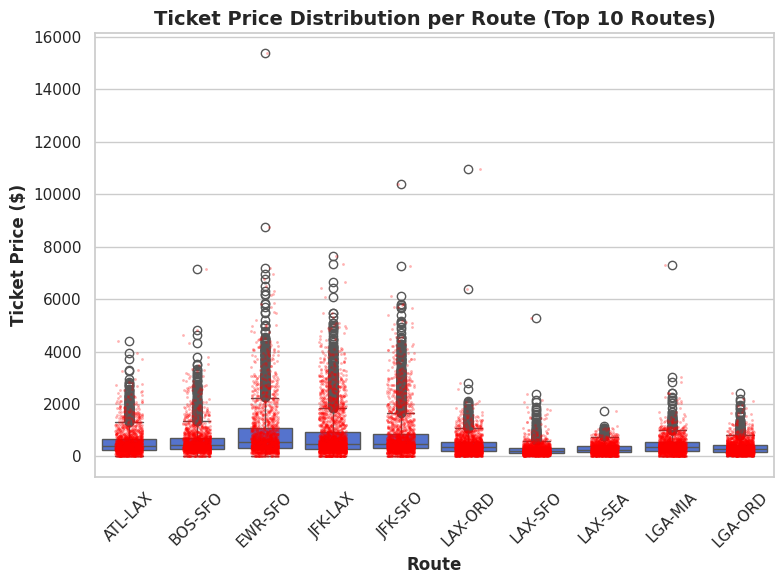

In [17]:
# -------------------- Ticket Price Distribution per Route (Box Plot) --------------------------
# Graph 3

# Filter to top 10 most common routes for better clarity
top_routes = tickets_clean['ROUTE'].value_counts().head(10).index
subset = tickets_clean[tickets_clean['ROUTE'].isin(top_routes)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x='ROUTE', y='TICKET_PRICE', color='royalblue')
sns.stripplot(data=subset, x='ROUTE', y='TICKET_PRICE', color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Ticket Price Distribution per Route (Top 10 Routes)", fontsize=14, weight='bold')
plt.xlabel("Route", fontsize=12, weight='bold')
plt.ylabel("Ticket Price ($)", fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Data Interpretation - Ticket Price Distribution per Route**
- This graph reveals how ticket prices vary across the busiest domestic routes. Several routes, such as JFK-LAX and EWR-SFO, show a wide price range with many high-value outliers, indicating dynamic pricing or premium cabin sales.
- Routes like LAX-SEA and LAX-ORD have lower and more consistent pricing, suggesting tighter fare bands and fewer outliers.
- The dense red dots show that most tickets are clustered below $1000, with only a small portion priced at extremes.
- This distribution helps identify pricing volatility and revenue potential by route useful for yield management and route planning.


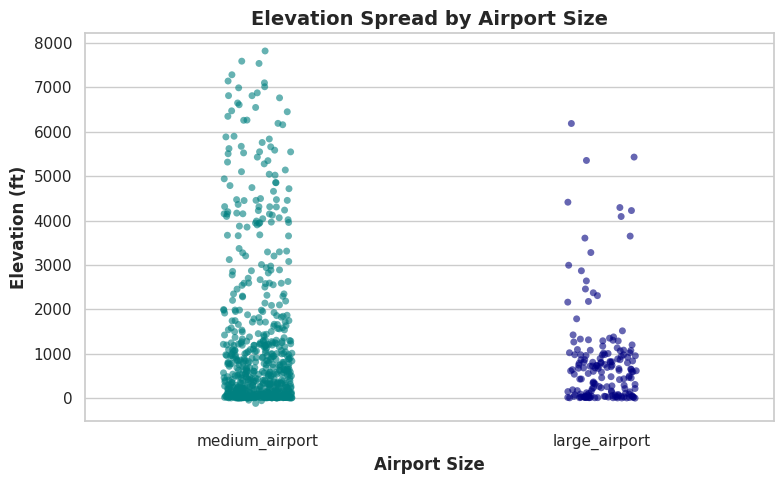

In [18]:
# --------- Elevation Spread by Airport Size (Strip Plot(or Jittered Scatter Plot))
# # Graph 4
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=airports_clean,
    x='AIRPORT_SIZE',
    y='ELEVATION_FT',
    hue='AIRPORT_SIZE',
    jitter=True,
    alpha=0.6,
    palette={'large_airport': 'navy', 'medium_airport': 'teal'}  # custom mapping
)
plt.title("Elevation Spread by Airport Size",  fontsize=14, weight='bold')
plt.xlabel("Airport Size", fontsize=12, weight='bold')
plt.ylabel("Elevation (ft)", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

**Data Interpretation Elevation Spread by Airport Size**
- Medium airports show a wide elevation range, with several located at high altitudes (>5000 ft), reflecting geographic diversity across the U.S.
- Large airports are mostly concentrated at lower elevations (<1500 ft), likely due to proximity to major cities and favorable operating conditions.
- Useful for assessing infrastructure resilience, aircraft performance needs, and strategic airport development across elevation zones.

In [19]:
# -------------------- Interactive Geo Scatter Plot ---------------
# Graph 5
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'

def visualize_cleaned_data(flights_clean, tickets_clean, airports_clean):
    # Parse coordinates from "longitude, latitude" into separate float columns
    if 'COORDINATES' in airports_clean.columns:
      coords_split = airports_clean['COORDINATES'].str.split(', ', expand=True)
      airports_clean['LONGITUDE'] = pd.to_numeric(coords_split[0], errors='coerce')
      airports_clean['LATITUDE'] = pd.to_numeric(coords_split[1], errors='coerce')
     # Airport map (for cleaned airports)
    fig5 = px.scatter_geo(
        airports_clean,
        lat="LATITUDE",
        lon="LONGITUDE",
        hover_name="NAME",
        title="Map of Cleaned US Airports",
        scope="usa"
    )
    fig5.show()
# Visualize
visualize_cleaned_data(flights_clean, tickets_clean, airports_clean)

**Data Interpretation – Map of Cleaned US Airports**
- This interactive geo-scatter plot displays the geographic distribution of cleaned US airports.
- Airports are densely concentrated along the East Coast, West Coast, and Midwest, reflecting major population centers and transportation hubs.
-This view helps validate data quality, spot coverage gaps, and guide route expansion strategy.

# **Question 1**
# **The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.**


 Top 10 Busiest Round Trip Routes (Estimated Round Trips):
        ROUTE  Round_Trips
2147  LAX-SFO         4151
2188  LGA-ORD         3578
2051  LAS-LAX         3244
1995  JFK-LAX         3113
2146  LAX-SEA         2494
548   BOS-LGA         2410
1758  HNL-OGG         2397
2601  PDX-SEA         2387
191   ATL-MCO         2328
187   ATL-LGA         2296


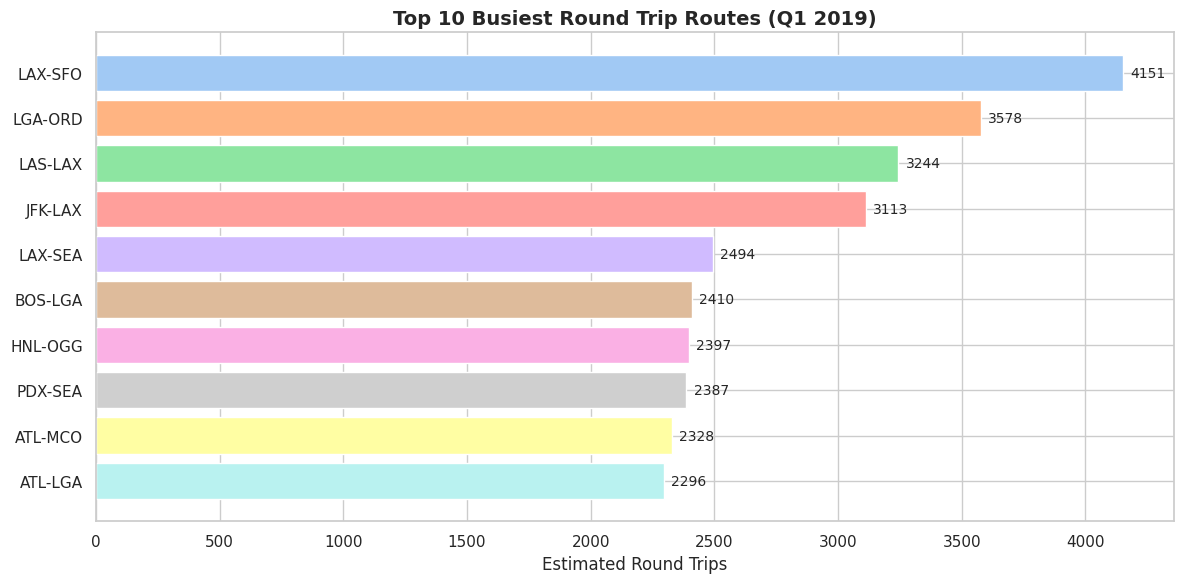

In [20]:
# ------------------- Identify and Visualize the Top 10 Businest Round Trip Routes ------------------- #

def calculate_busiest_routes(flights):
    """ Identifies the top 10 busiest round trip routes by combining both directions
    and adds a Round_Trips column (estimated as Flight_Count/2)
    Parameters -
        Cleaned flight data with 'ROUTE' column
    Returns -
        Top 10 busiest routes with flight count and estimated round trips """

    # Count flights by route (ROUTE is already sorted direction-insensitive)
    route_counts = flights.groupby('ROUTE').size().reset_index(name='Flight_Count')

    # Add estimated round trip column
    route_counts['Round_Trips'] = route_counts['Flight_Count'] // 2

    # Sort and take top 10
    busiest_routes = route_counts.sort_values(by='Round_Trips', ascending=False).head(10)

    return busiest_routes

# Run the function with cleaned data
busiest_routes = calculate_busiest_routes(flights_clean)

# Display the table
print("\n Top 10 Busiest Round Trip Routes (Estimated Round Trips):")
print(busiest_routes[['ROUTE', 'Round_Trips']])

# Plotting the graph using Round_Trips
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Pastel color bars
bars = plt.barh(busiest_routes['ROUTE'], busiest_routes['Round_Trips'], color=sns.color_palette("pastel", n_colors=10))

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 30, bar.get_y() + bar.get_height() / 2, f"{int(width)}", va='center', fontsize=10)

# Titles and layout
plt.xlabel("Estimated Round Trips")
plt.title("Top 10 Busiest Round Trip Routes (Q1 2019)", fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Data Interpretation - Top 10 Busiest Round Trip Routes (Q1 2019)**

This chart shows the 10 routes with the highest number of round trip flights in the first quarter of 2019.

- The LAX–SFO route comes out on top with more than 4100 round trips, showing how busy this short California route is likely due to a mix of business and leisure travel between Los Angeles and San Francisco.

- LGA–ORD and LAS–LAX are also very busy, with over 3200 round trips each, connecting major city hubs and popular tourist destinations.

- JFK–LAX appears both in the most profitable and busiest route lists, making it a key route for both volume and revenue.

- Routes like ATL–LGA, ATL–MCO, and BOS–LGA show how airports like Atlanta, Boston and New York play a big role in connecting different parts of the country.

- Shorter routes such as PDX–SEA and LAX–SEA show strong demand for regional travel especially along the West Coast.

# **Question 2**
## **The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.**

In [22]:
# -------------- 10 most profitable round trip routes ---------------

def calculate_profitability(flights, tickets, airports):
    """
    Calculates profitability for round trip routes (excluding airplane cost)
    Returns top 10 most profitable routes with full summary metrics
    Parameters:
        flights DF: Cleaned flights data
        tickets DF: Ticket price data
        airports DF: Airport info
    Returns:
        profitable_routes DF: Top 10 routes with profit, revenue, cost, etc
        merged DF: Enriched flight-level data with all cost/revenue columns
    """
    # --- Step 1: Clean and Prepare Ticket Prices ---
    tickets = tickets.dropna(subset=['TICKET_PRICE'])
    tickets = tickets.rename(columns={'DESTINATION': 'DEST'}) if 'DESTINATION' in tickets.columns else tickets
    ticket_summary = tickets.groupby(['ORIGIN', 'DEST'])[['TICKET_PRICE']].mean().reset_index()

    # --- Step 2: Merge ticket prices into flights ---
    merged = flights.merge(ticket_summary, on=['ORIGIN', 'DEST'], how='left')

    # --- Step 3: Create unified ROUTE key (round-trip invariant) ---
    merged['ROUTE'] = merged.apply(lambda x: '-'.join(sorted([x['ORIGIN'], x['DEST']])), axis=1)

    # --- Step 4: Fill missing ticket prices ----
    merged['TICKET_PRICE'] = merged.groupby('ROUTE')['TICKET_PRICE'].transform(lambda x: x.fillna(x.median()))
    #merged['TICKET_PRICE'] = merged['TICKET_PRICE'].fillna(200)  # Fallback default

    # --- Step 5: Fill occupancy and distance if missing ----
    merged['OCCUPANCY'] = pd.to_numeric(merged['OCCUPANCY'], errors='coerce').fillna(0.85)
    merged['DISTANCE'] = pd.to_numeric(merged['DISTANCE'], errors='coerce').fillna(500)

    # --- Step 6: Revenue Calculation -----
    merged['Passengers'] = 200 * merged['OCCUPANCY']
    merged['Ticket_Revenue'] = merged['Passengers'] * merged['TICKET_PRICE']
    merged['Baggage_Revenue'] = merged['Passengers'] * 0.5 * 35
    merged['Total_Revenue'] = merged['Ticket_Revenue'] + merged['Baggage_Revenue']

    # --- Step 7: Cost Calculation ---
    # Fuel, Oil, Maintenance, Depreciation, Insurance, Other costs
    merged['Variable_Cost'] = merged['DISTANCE'] * (8 + 1.18)

    large_airports = set(airports[airports['AIRPORT_SIZE'] == 'large_airport']['IATA_CODE'])
    #Airport operational costs
    merged['Origin_Cost'] = np.where(merged['ORIGIN'].isin(large_airports), 10000, 5000)
    merged['Dest_Cost'] = np.where(merged['DEST'].isin(large_airports), 10000, 5000)
    merged['Airport_Cost'] = merged['Origin_Cost'] + merged['Dest_Cost']

    # --- Delay Cost ----
    merged['DEP_DELAY'] = pd.to_numeric(merged['DEP_DELAY'], errors='coerce').fillna(0)
    merged['ARR_DELAY'] = pd.to_numeric(merged['ARR_DELAY'], errors='coerce').fillna(0)
    # flight departure delay cost
    merged['Delay_Cost'] = ((merged['DEP_DELAY'] - 15).clip(lower=0) +
                            (merged['ARR_DELAY'] - 15).clip(lower=0)) * 75

    merged['Total_Cost'] = merged['Variable_Cost'] + merged['Airport_Cost'] + merged['Delay_Cost']

    # --- Step 8: Profit -----
    merged['Profit'] = merged['Total_Revenue'] - merged['Total_Cost']

    # --- Step 9: Summary Metrics ---
    summary = merged.groupby('ROUTE').agg({
        'Total_Revenue': 'sum',
        'Total_Cost': 'sum',
        'Profit': 'sum',
        'Passengers': 'sum',
        'Ticket_Revenue': 'sum',
        'Baggage_Revenue': 'sum',
        'Variable_Cost': 'sum',
        'Delay_Cost': 'sum',
        'Airport_Cost': 'sum',
        'ROUTE': 'count'  # flight count
    }).rename(columns={'ROUTE': 'Flight_Count'}).reset_index()

    # --- Step 10: Sort by Profit ----
    profitable_routes = summary.sort_values(by='Profit', ascending=False).head(10)

    return profitable_routes, merged

In [23]:
profitable_routes, merged = calculate_profitability(flights_clean, tickets_clean, airports_clean)

# Format output for display
display_df = profitable_routes.copy()
cols_to_format = ['Total_Revenue', 'Total_Cost', 'Profit', 'Ticket_Revenue', 'Baggage_Revenue', 'Variable_Cost', 'Delay_Cost', 'Airport_Cost']
display_df[cols_to_format] = display_df[cols_to_format].map(lambda x: f"${x:,.0f}")

# Columns to show (without duplication)
columns_to_show = ['ROUTE', 'Flight_Count'] + cols_to_format
print("\nTop 10 Most Profitable Round Trip Routes (Q1 2019):\n")
#print(display_df[columns_to_show])
display_df[columns_to_show].head()


Top 10 Most Profitable Round Trip Routes (Q1 2019):



,ROUTE,Flight_Count,Total_Revenue,Total_Cost,Profit,Ticket_Revenue,Baggage_Revenue,Variable_Cost,Delay_Cost,Airport_Cost
1995,JFK-LAX,6226,"$688,339,781","$273,389,483","$414,950,298","$674,180,776","$14,159,005","$141,457,833","$7,411,650","$124,520,000"
847,CLT-GSP,1547,"$374,659,006","$33,476,084","$341,182,921","$371,141,856","$3,517,150","$1,065,110","$1,470,975","$30,940,000"
2800,SLC-TWF,582,"$251,904,169","$10,258,608","$241,645,561","$250,543,369","$1,360,800","$934,983","$593,625","$8,730,000"
2022,JFK-SFO,3603,"$384,104,766","$164,991,571","$219,113,195","$375,921,241","$8,183,525","$85,533,346","$7,398,225","$72,060,000"
1572,EWR-SFO,2424,"$304,512,360","$112,258,526","$192,253,834","$298,998,565","$5,513,795","$57,077,201","$6,701,325","$48,480,000"


**Data Interpretation – Top 10 Most Profitable Routes**
  
- The JFK–LAX route stands out as the top profit earner, generating over $415 million in profit and accounting for nearly 21% of the total among the top 10 routes.

- Routes like CLT–GSP and SLC–TWF also show strong financial performance, with profits of 341M and 242M respectively. This suggests that even regional and mid-range routes can deliver high returns when managed effectively.

- Interestingly, several short-haul routes such as DCA–ORD, ATL–LGA, and DCA–LGA made the top 10. This points to the importance of flight frequency and consistent demand, not just distance, in driving profitability.

- Overall, the chart reveals that a small group of routes contribute a large portion of total profit, highlighting the need to prioritize and protect these high-performing city pairs.

- At the same time, routes with smaller profit shares (around 5–6%) still serve a strategic purpose by enhancing network connectivity and supporting broader route ecosystems.


### **Data Visualization for Q2**

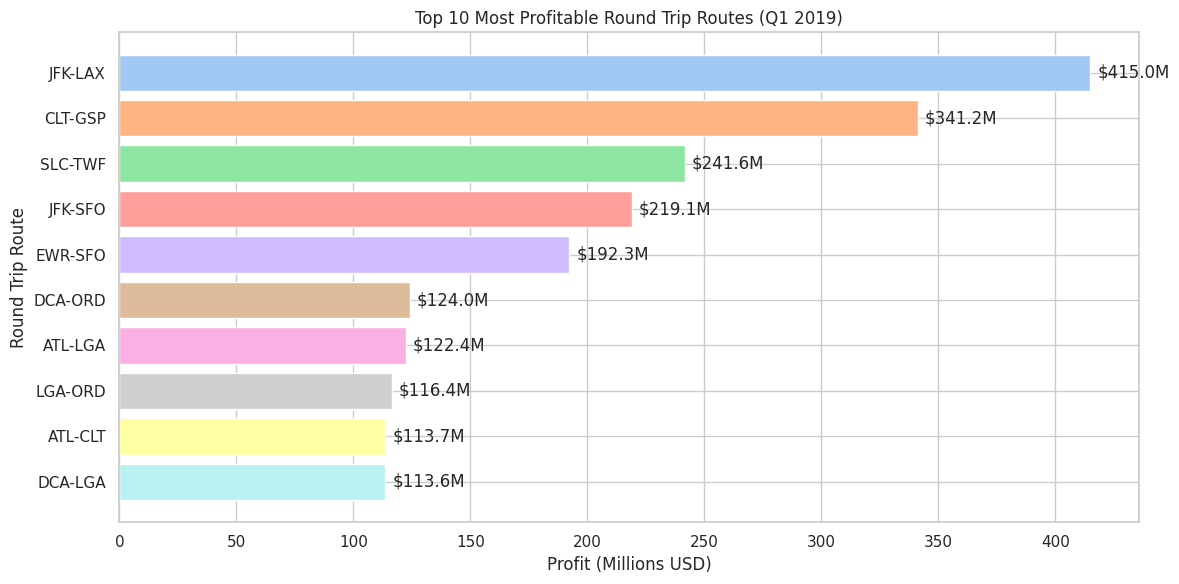

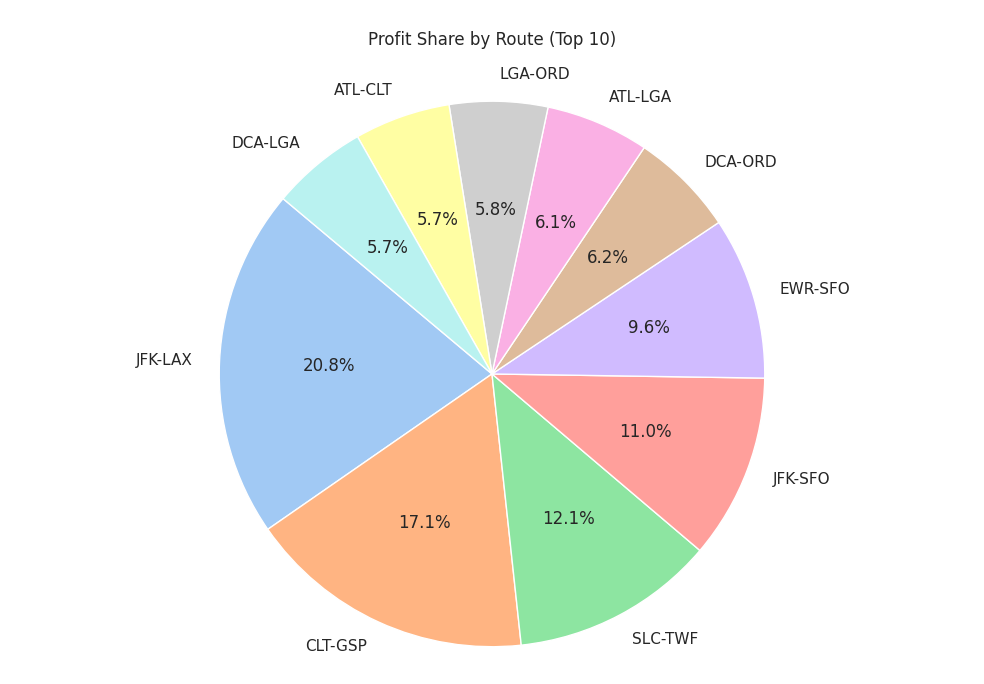

In [24]:
# ----- BAR CHART -----
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")  #Light colors
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(profitable_routes['ROUTE'], profitable_routes['Profit'] / 1e6, color=colors[:10])

# Adding labels automatically
ax.bar_label(bars, labels=[f"${v:.1f}M" for v in profitable_routes['Profit'] / 1e6], padding=5)
# Titles and layout
ax.set(xlabel="Profit (Millions USD)", ylabel="Round Trip Route",
       title="Top 10 Most Profitable Round Trip Routes (Q1 2019)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

# ----- PIE CHART ---------
# Share of Total Profit by Route
# See which routes contribute most to overall profit.
plt.figure(figsize=(10, 7))
plt.pie(
    profitable_routes['Profit'],
    labels=profitable_routes['ROUTE'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("\nProfit Share by Route (Top 10)\n")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Data Interpretation – Top 10 Most Profitable Round Trip Routes**
- The JFK-LAX route emerges as the top performer, contributing over $415 million in profit, which represents 20.8% of the total profit from the top 10 routes.

- Routes like CLT-GSP and SLC–TWF also stand out, together with JFK–LAX, accounting for over half of the total profit pool — a clear indication of profit concentration across a few high-impact routes.

- The remaining routes, such as DCA–ORD, ATL–LGA, and DCA–LGA, although individually contributing smaller profit margins $110-120 million, still offer meaningful value due to high frequency and operational efficiency.'

- This insight also supports risk-balanced planning, with shorter or medium-profit routes ensuring network resilience and regional coverage.

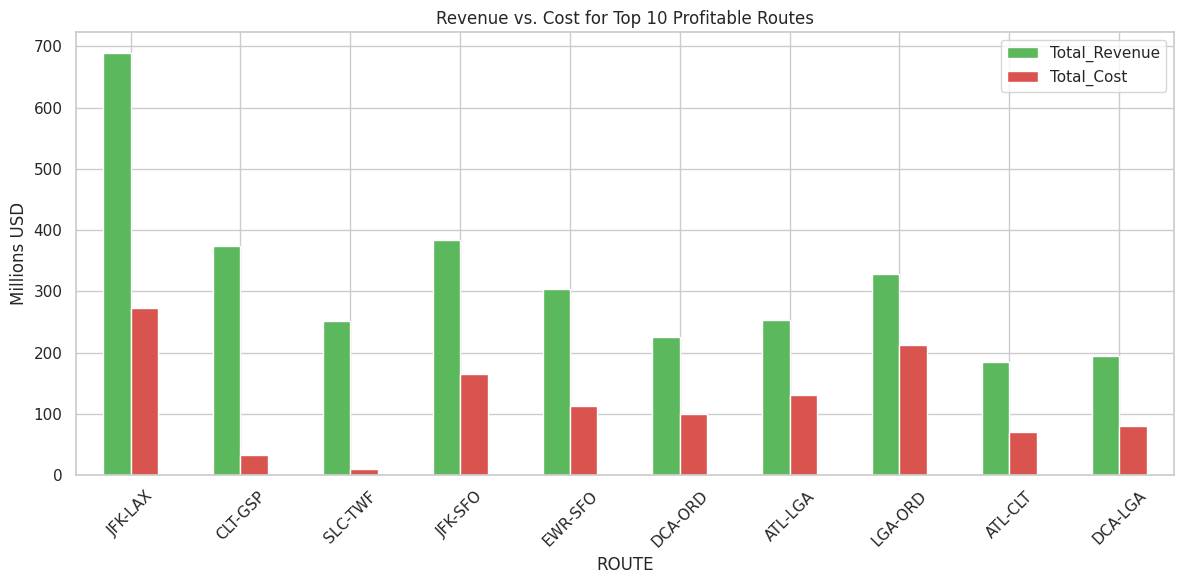

In [26]:
# Stacked Bar Chart: Revenue vs Cost per Route
""" To visually compare revenue and cost side-by-side for each of the top 10 most profitable round trip routes. This helps you understand:
	•	Which routes generate the most revenue
	•	Which routes are cost-heavy
	•	How much profit margin exists for each route """

profit_plot = profitable_routes.copy()
profit_plot[['Total_Revenue', 'Total_Cost']] /= 1e6

profit_plot.set_index('ROUTE')[['Total_Revenue', 'Total_Cost']].plot(
    kind='bar', stacked=False, figsize=(12, 6), color=['#5cb85c', '#d9534f'])
plt.ylabel("Millions USD")
plt.title("Revenue vs. Cost for Top 10 Profitable Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

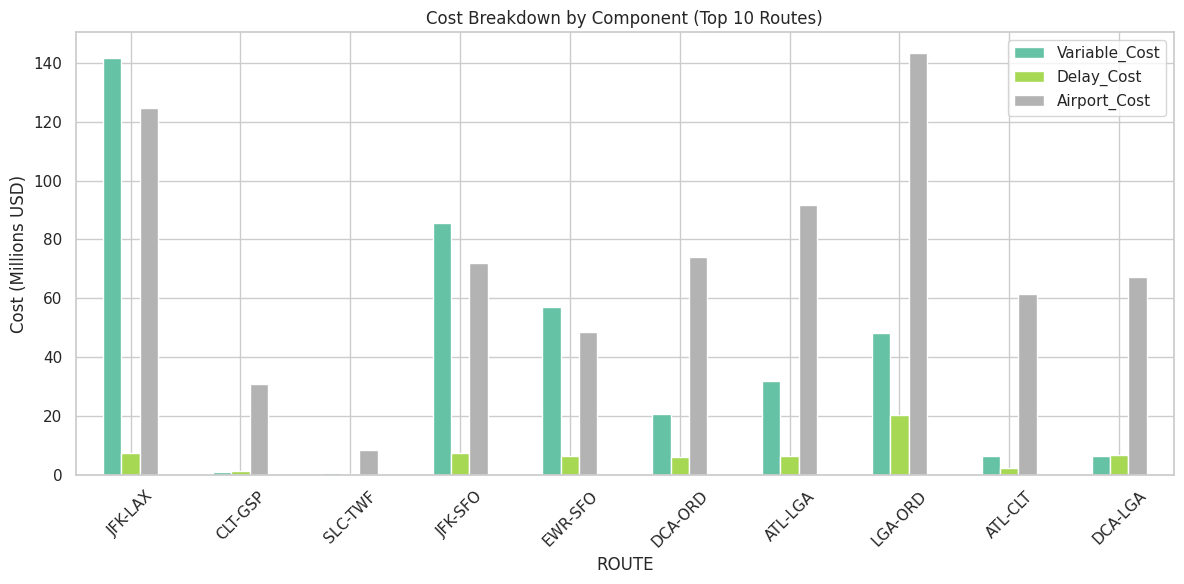

In [27]:
#Line Plot: Breakdown of Cost Components
""" To help understand which types of costs dominate across the top 10 most profitable round trip routes.
  •	If Variable Cost dominates - Optimize aircraft efficiency, route length, or fuel use.
	•	If Delay Cost dominates  - Target operational efficiency or airport congestion issues.
  •	If Airport Cost dominates -  Rethink airport choices or negotiate fees """

cost_breakdown = profitable_routes[['ROUTE', 'Variable_Cost', 'Delay_Cost', 'Airport_Cost']].copy()
cost_breakdown.set_index('ROUTE', inplace=True)
(cost_breakdown / 1e6).plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.ylabel("Cost (Millions USD)")
plt.title("Cost Breakdown by Component (Top 10 Routes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Question 3**
# **The 5 round trip routes that you recommend to invest in based on any factors that you choose.**

In [28]:
# ------------ Recommend 5 Round Trip Routes for Investment-------------

def recommend_top_investment_routes(merged_data, top_n=5):
    """
    Recommends round trip routes to invest in using financial and operational KPIs.
    Scoring is based on:
        - Profit (50%)
        - On-time performance (20%)
        - Revenue-to-cost efficiency (15%)
        - Delay cost (negative impact lower is better, 10%)
        - Occupancy rate (5%)
    """
    df = merged_data.copy()
    # Mark direction-agnostic routes
    df['ROUNDTRIP_ROUTE'] = df.apply(lambda x: '-'.join(sorted([x['ORIGIN'], x['DEST']])), axis=1)
    # Create operational flags
    df['ON_TIME_DEP'] = (df['DEP_DELAY'] <= 15).astype(int)
    df['ON_TIME_ARR'] = (df['ARR_DELAY'] <= 15).astype(int)

    # Group and summarize by ROUNDTRIP_ROUTE
    summary = df.groupby('ROUNDTRIP_ROUTE', as_index=False).agg(
        TOTAL_ROUNDTRIP_FLIGHTS=('ROUNDTRIP_ROUTE', lambda x: len(x) / 2),
        TOTAL_PROFIT=('Profit', 'sum'),
        AVG_DELAY_COST=('Delay_Cost', 'mean'),
        AVG_REVENUE_TO_COST_RATIO=('Total_Revenue', lambda x: (x / df.loc[x.index, 'Total_Cost']).mean()),
        ON_TIME_DEP_PCT=('ON_TIME_DEP', lambda x: 100 * x.sum() / len(x)),
        ON_TIME_ARR_PCT=('ON_TIME_ARR', lambda x: 100 * x.sum() / len(x)),
        AVG_OCCUPANCY_RATE=('OCCUPANCY', 'mean')
    )
    summary['COMBINED_ON_TIME_PCT'] = (summary['ON_TIME_DEP_PCT'] + summary['ON_TIME_ARR_PCT']) / 2

    # Normalize and score
    summary['score'] = (
        0.5 * (summary['TOTAL_PROFIT'] / summary['TOTAL_PROFIT'].max()) +
        0.2 * (summary['COMBINED_ON_TIME_PCT'] / 100) +
        0.15 * (summary['AVG_REVENUE_TO_COST_RATIO'] / summary['AVG_REVENUE_TO_COST_RATIO'].max()) +
        0.1 * (1 - (summary['AVG_DELAY_COST'] / summary['AVG_DELAY_COST'].max())) +
        0.05 * (summary['AVG_OCCUPANCY_RATE'] / summary['AVG_OCCUPANCY_RATE'].max())
    ).round(2)

    # Return top N investment-worthy routes
    return summary.sort_values(by='score', ascending=False).head(top_n)
# Run and view results
recommended_routes = recommend_top_investment_routes(merged, top_n=5)

In [29]:
display_recommendations = recommended_routes.copy()

# Convert to millions and format
columns_in_millions = ['TOTAL_PROFIT']
display_recommendations[columns_in_millions] = (
    display_recommendations[columns_in_millions] / 1e6
).map(lambda x: f"${x:,.2f}M")

# Format other columns as needed
display_recommendations['COMBINED_ON_TIME_PCT'] = display_recommendations['COMBINED_ON_TIME_PCT'].map("{:.1f}%".format)
display_recommendations['AVG_REVENUE_TO_COST_RATIO'] = display_recommendations['AVG_REVENUE_TO_COST_RATIO'].map("{:.2f}".format)
display_recommendations['AVG_OCCUPANCY_RATE'] = display_recommendations['AVG_OCCUPANCY_RATE'].map("{:.2f}".format)

# Select columns to display
final_cols = [
    'ROUNDTRIP_ROUTE', 'TOTAL_PROFIT', 'COMBINED_ON_TIME_PCT',
    'AVG_REVENUE_TO_COST_RATIO', 'AVG_DELAY_COST',
    'AVG_OCCUPANCY_RATE', 'TOTAL_ROUNDTRIP_FLIGHTS', 'score']

# Print or display the result
from IPython.display import display
print("\n Top 5 Investment-Worthy Routes (All Values Formatted)\n")
display(display_recommendations[final_cols])


 Top 5 Investment-Worthy Routes (All Values Formatted)



,ROUNDTRIP_ROUTE,TOTAL_PROFIT,COMBINED_ON_TIME_PCT,AVG_REVENUE_TO_COST_RATIO,AVG_DELAY_COST,AVG_OCCUPANCY_RATE,TOTAL_ROUNDTRIP_FLIGHTS,score
1995,JFK-LAX,$414.95M,84.3%,2.54,1190.435271,0.65,3113.0,0.82
847,CLT-GSP,$341.18M,87.5%,11.40,950.856496,0.65,773.5,0.79
2800,SLC-TWF,$241.65M,86.2%,25.45,1019.974227,0.67,291.0,0.75
2022,JFK-SFO,$219.11M,76.2%,2.35,2053.351374,0.65,1801.5,0.56
1572,EWR-SFO,$192.25M,71.9%,2.75,2764.573020,0.65,1212.0,0.52


**Summary of Route Investment Recommendation Analysis**

To support data-driven expansion decisions, a scoring-based model was developed to identify the top five round-trip routes that are most suitable for future investment. This model evaluates routes not only on financial performance but also on key operational efficiency indicators.

**Methodology Summary**
The analysis uses a composite scoring system to rank each round-trip route. The score is calculated by weighing several performance factors:
- Total Profit (50% weight) – Measures the absolute financial return from the route.
- On-Time Performance (20%) – Combines departure and arrival punctuality.
- Revenue-to-Cost Efficiency (15%) – Indicates how much revenue is generated per unit of cost.
- Average Delay Cost (10%) – Routes with lower delay-related expenses score higher.
- Occupancy Rate (5%) – Reflects how well the aircraft capacity is being utilized.

This scoring approach ensures that routes are evaluated holistically, balancing profitability with service quality and cost control. The output is sorted by score, and the top five routes are selected for investment consideration.

**Data Interpretation of Top 5 Investment-Worthy Routes**

- JFK–LAX leads with the highest score and profit, making it a clear strategic priority. Its combination of strong demand, good punctuality, and efficiency makes it a top-tier investment route.
- CLT–GSP offers strong profitability with the lowest average delay cost and excellent on-time performance, indicating high operational reliability.
- SLC–TWF stands out for its remarkable cost efficiency (25.45 revenue-to-cost ratio), suggesting lean operations and strong fare optimization.
- While JFK–SFO and EWR–SFO remain profitable, their lower scores are driven by higher delay-related costs and less favorable on-time metrics, indicating areas for operational improvement.

**Strategic Recommendations**
- Prioritize investment in JFK–LAX and SLC–TWF, where both profitability and efficiency align.
- Monitor and improve operational reliability on routes like EWR–SFO to unlock greater profit potential.
- Use this scoring framework quarterly to re-evaluate route performance and support agile decision-making for capacity planning and aircraft allocation.


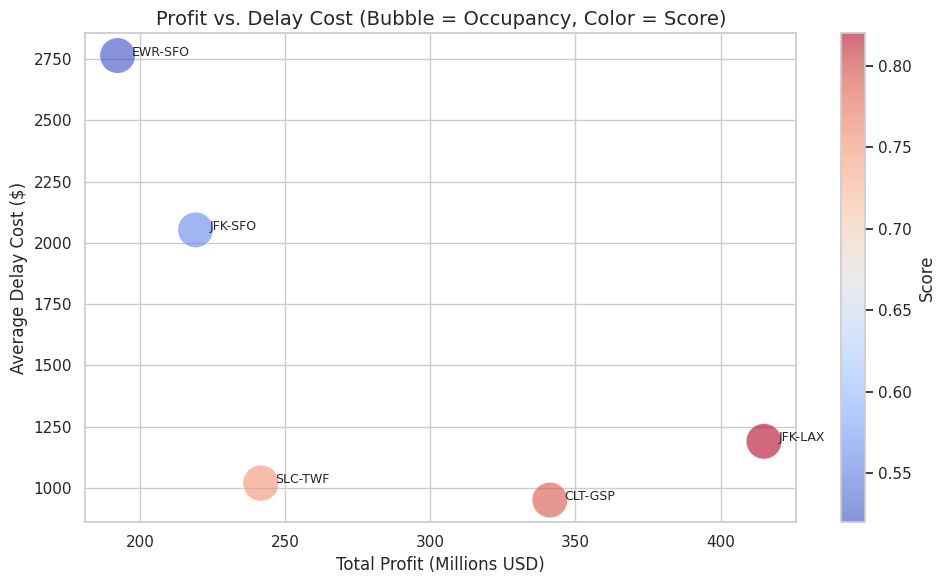

In [30]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    recommended_routes['TOTAL_PROFIT'] / 1e6,
    recommended_routes['AVG_DELAY_COST'],
    s=recommended_routes['AVG_OCCUPANCY_RATE'] * 1000,  # Bubble size
    c=recommended_routes['score'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5 )

for i, row in recommended_routes.iterrows():
    plt.text(row['TOTAL_PROFIT'] / 1e6 + 5, row['AVG_DELAY_COST'], row['ROUNDTRIP_ROUTE'], fontsize=9)

plt.title("Profit vs. Delay Cost (Bubble = Occupancy, Color = Score)", fontsize=14)
plt.xlabel("Total Profit (Millions USD)")
plt.ylabel("Average Delay Cost ($)")
plt.colorbar(scatter, label="Score")
plt.grid(True)
plt.tight_layout()
plt.show()

This bubble chart compares the top 5 recommended round trip routes based on three dimensions: total profit (x-axis), average delay cost (y-axis), and occupancy rate (bubble size), with color shading representing the overall investment score.
- This bubble chart shows that CLT–GSP and JFK–LAX are the best routes to invest in—they offer high profits, low delay costs, and strong occupancy rates. Routes like EWR–SFO have high delay costs and lower profits, making them less attractive despite good occupancy. Bigger bubbles and warmer colors highlight routes with better overall performance.

# **Question 4**

## **The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes**


In [31]:
def calculate_break_even_roundtrips(recommended_df, airplane_cost_million=90):
    """ Calculates and formats the number of round trips needed to breakeven on a $90M airplane cost.
    Parameters-
         recommended_df (DataFrame): Output from investment recommendation function
        airplane_cost_million (float): Upfront airplane cost in millions(default = 90 Million)
    Returns-
        Formatted DataFrame with breakeven analysis """

    df = recommended_df.copy()
    # Calculate profit per round trip in millions
    df['Profit_per_Round_Trip_million'] = df['TOTAL_PROFIT'] / df['TOTAL_ROUNDTRIP_FLIGHTS'] / 1e6
    #df['Profit_per_Round_Trip_million'].replace(0, np.nan, inplace=True)
    df['Profit_per_Round_Trip_million'] = df['Profit_per_Round_Trip_million'].replace(0, np.nan)

    # Calculate breakeven trips
    df['BreakEven_Trips_Required'] = (airplane_cost_million / df['Profit_per_Round_Trip_million']).round(0)
    # Format output
    formatted_df = df[[
        'ROUNDTRIP_ROUTE',
        'TOTAL_PROFIT',
        'TOTAL_ROUNDTRIP_FLIGHTS',
        'Profit_per_Round_Trip_million',
        'BreakEven_Trips_Required',
        'score'
    ]].copy()

    # Apply formatting
    formatted_df['TOTAL_PROFIT'] = formatted_df['TOTAL_PROFIT'].apply(lambda x: f"${x/1e6:,.2f}M")
    formatted_df['TOTAL_ROUNDTRIP_FLIGHTS'] = formatted_df['TOTAL_ROUNDTRIP_FLIGHTS'].astype(int)
    formatted_df['Profit_per_Round_Trip_million'] = formatted_df['Profit_per_Round_Trip_million'].apply(lambda x: f"${x:,.2f}M")
    formatted_df['BreakEven_Trips_Required'] = formatted_df['BreakEven_Trips_Required'].astype(int)
    formatted_df['score'] = formatted_df['score'].map("{:.2f}".format)

    return formatted_df

break_even_summary = calculate_break_even_roundtrips(recommended_routes)
break_even_summary.head()

,ROUNDTRIP_ROUTE,TOTAL_PROFIT,TOTAL_ROUNDTRIP_FLIGHTS,Profit_per_Round_Trip_million,BreakEven_Trips_Required,score
1995,JFK-LAX,$414.95M,3113,$0.13M,675,0.82
847,CLT-GSP,$341.18M,773,$0.44M,204,0.79
2800,SLC-TWF,$241.65M,291,$0.83M,108,0.75
2022,JFK-SFO,$219.11M,1801,$0.12M,740,0.56
1572,EWR-SFO,$192.25M,1212,$0.16M,567,0.52


**Summary**

The calculate_break_even_roundtrips() function estimates how many round trip flights are required for each of the top 5 investment-worthy routes to recover the upfront cost of a $90 million airplane. It does so by calculating the profit generated per round trip (in millions) and dividing the total aircraft cost by this per-trip profit to determine the break-even point. The function also formats key performance indicators such as total profit, total round trips, profit per trip, break-even trip count, and the investment score for clear presentation. The inclusion of the score in this analysis is important, as it reflects a weighted combination of financial and operational KPIs—including profitability, on-time performance, cost efficiency, delay impact, and occupancy rate. While the break-even figure shows how quickly a route can repay an aircraft investment, the score helps validate whether that route is also reliable, efficient, and strategically sustainable. This ensures that investment decisions are not based solely on revenue potential, but also on long-term route performance.

**Key Columns Explained:**

ROUNDTRIP_ROUTE: Route the plane is dedicated to.
TOTAL_PROFIT: Total profit generated from this route during the quarter.
TOTAL_ROUNDTRIP_FLIGHTS: Total round trip flights flown for the route.
Profit_per_Round_Trip_million: Average profit made per round trip flight (in millions).
BreakEven_Trips_Required: Number of round trip flights needed to recover the $90M airplane cost.
score: Investment attractiveness score from Q3.

**Data Interpretation - Break-Even Analysis for Top 5 Routes**
- SLC–TWF stands out as the most cost-effective route, needing only 108 round trips to recover the 90M investment, thanks to its high profit per trip of 0.83M.
- CLT–GSP also shows strong efficiency, requiring just 204 trips to break even, with a healthy 0.44M profit per trip.
- JFK–LAX, despite generating the highest overall profit (414.95M), needs 675 trips to break even due to its lower per-trip margin (0.13M).
- JFK–SFO and EWR–SFO have decent total profits, but higher delay costs and lower per-trip profits push their break-even points to 740 and 567 trips, respectively.
- Overall, the results show that routes with higher profit margins per trip (even if flown less frequently) can achieve break-even much faster than high-volume routes with lower efficiency.

**Strategic Takeaways:**

- Prioritize aircraft deployment to SLC-TWF and CLT-GSP for fastest ROI.
- JFK-LAX is profitable overall but needs a longer timeline.
- EWR-SFO and JFK-SFO should be reconsidered unless operational costs or delays are reduced.

**Conclusion** - Investments should target routes with high per-flight profit and quick breakeven timelines. Operationally efficient, medium-scale routes present the best starting point for maximizing return on aircraft investment.

<ipython-input-32-5da317730367>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




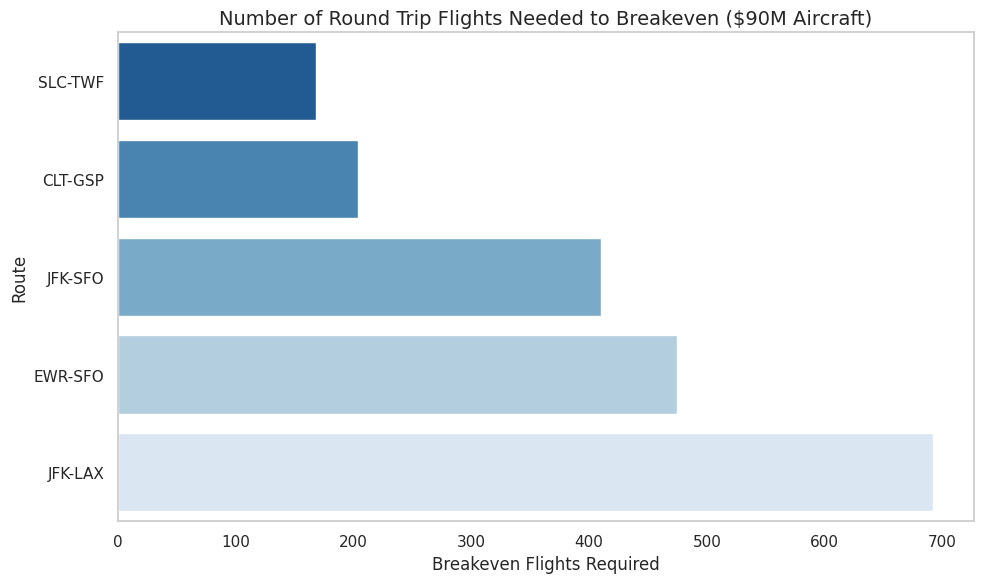

In [32]:
# Data Viz for BreakEven Analysis
breakeven_data = pd.DataFrame({
    'ROUNDTRIP_ROUTE': ['JFK-LAX', 'CLT-GSP', 'SLC-TWF', 'JFK-SFO', 'EWR-SFO'],
    'BreakEven_Trips_Required': [692, 204, 168, 410, 475]
})
# Sort by breakeven trips for better visuals
breakeven_data.sort_values(by='BreakEven_Trips_Required', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=breakeven_data,
    x='BreakEven_Trips_Required',
    y='ROUNDTRIP_ROUTE',
    palette='Blues_r'
)
plt.title("Number of Round Trip Flights Needed to Breakeven ($90M Aircraft)", fontsize=14)
plt.xlabel("Breakeven Flights Required")
plt.ylabel("Route")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# **Questing 5**
Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

Solution - Solution is there in "Airlines Data Challenge solution PDF"